In [1]:
#pip install seaborn 

In [2]:
#pip install xgboost

In [3]:
# operational 
import pandas as pd 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')

# data preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
# visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

# ML algorthims 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# evaluation metris 
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, accuracy_score, precision_score, precision_recall_curve

# hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

In [4]:
# load the datasets 
healthcare_data = pd.read_csv("watson_healthcare_modified.csv")
pd.set_option("display.max_columns", None )
# review the columns 
healthcare_data.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
# review the shape of healthcare data 
print(healthcare_data.shape)

(1676, 35)


In [6]:
print("\nHealthcare data info:")
print(healthcare_data.info())


Healthcare data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  J

In [7]:
print("Missing values in healthcare data:")
print(healthcare_data.isnull().sum())

Missing values in healthcare data:
EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
Years

In [8]:
healthcare_data.nunique()

EmployeeID                  1676
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        5
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
Shift                          4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

#### There are a total of 1676 unique EmployeeID
    - There are three columns that do not give much valuable information: EmployeeCount, Over18 and StandardHours whcih can all be dropped

In [9]:
# drop constant columns 
columns_to_drop = ["EmployeeID", "EmployeeCount", "Over18", "StandardHours"]
healthcare_data.drop(columns=columns_to_drop, inplace=True)

In [10]:
# checking the shape of the healthcare data
healthcare_data.shape

(1676, 31)

In [11]:
healthcare_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,61,2,2,Other,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,56,3,1,Other,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [12]:
healthcare_data['JobSatisfaction'].value_counts()

JobSatisfaction
4    530
3    507
1    329
2    310
Name: count, dtype: int64

In [13]:
# categorical columns 
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 'OverTime',
                    'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']

# numerical columns 
numerica_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear', 'Shift', 'TotalWorkingYears']

In [14]:
# check statistics on numerical columns 
healthcare_data[numerica_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1676.0,36.866348,9.129126,18.0,30.00,36.0,43.00,60.0
DailyRate,1676.0,800.557876,401.594438,102.0,465.00,796.5,1157.00,1499.0
DistanceFromHome,1676.0,9.221957,8.158118,1.0,2.00,7.0,14.00,29.0
HourlyRate,1676.0,65.470167,20.207572,30.0,48.00,65.5,83.00,100.0
MonthlyIncome,1676.0,6516.512530,4728.456618,1009.0,2928.25,4899.0,8380.25,19999.0
MonthlyRate,1676.0,14287.019690,7138.857783,2094.0,7993.00,14269.5,20462.00,26999.0
NumCompaniesWorked,1676.0,2.662291,2.477704,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1676.0,15.196897,3.646550,11.0,12.00,14.0,18.00,25.0
YearsAtCompany,1676.0,7.033413,6.098991,0.0,3.00,5.0,10.00,40.0
YearsInCurrentRole,1676.0,4.264916,3.627456,0.0,2.00,3.0,7.00,18.0


#### We can see from this statistics that: 
    - The average age is 37 years. The min age is 18 and the max is 60 years
    - The average distance from homes to work is 9,22 mi and 50% of the employees live within 7 mi. 
    - More than 50% of the employees work for two companies at the same time, and the maximum is 9 companies
    - The average percentage salary hike is 15%
    - On average employees spend 7 years at the company, with half of the employees with 5 years retention. 
    - It takes a little more than 2 years to get a promotion on average, but for most employees it takes 3 years 
    - The average years in current role is 4.2 years 
    - Zero values in 'NumCompaniesWorked', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager' could mean missing data, or need more investigation
    - The 'Shift' column could be categorical 



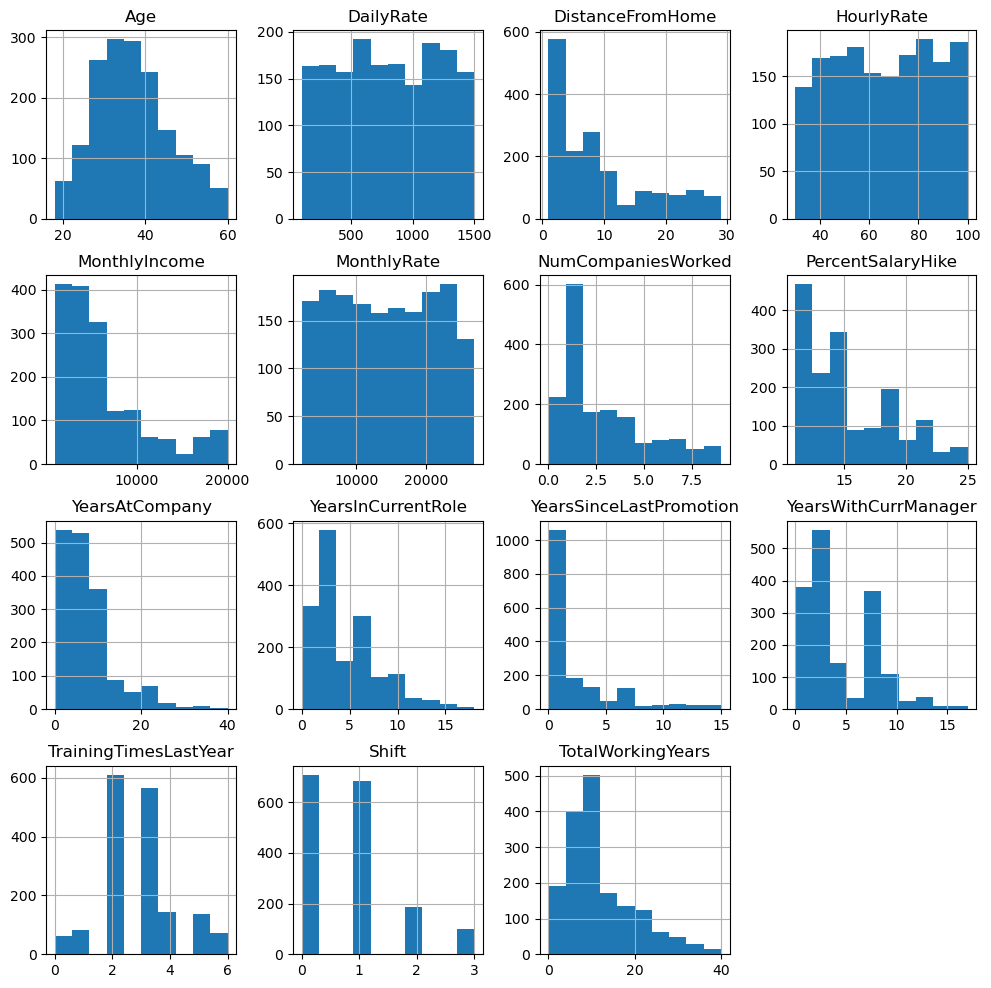

In [15]:
# plot distribution of numerical columns 
healthcare_data[numerica_cols].hist(figsize=(12,12))
plt.show()

### Observations:
    - Age:The distribution is approximately normal, centered around 35-40. Most employees are between 20 and 50 years old, with fewer at the     extremes.

    - DailyRate:The data is uniformly distributed across the range, indicating no specific concentration of daily rates. 
    
    - DistanceFromHome: Skewed right (positive skew). Most employees live close to work (0-10 units), with a few living farther away.

    - HourlyRate: Fairly uniform distribution, with hourly rates spread evenly from 30 to 100.

    - MonthlyIncome:Strongly right-skewed, indicating that most employees earn lower monthly incomes (closer to the median of ~5,000), with a small number earning very high incomes.

    - MonthlyRate: Broad distribution with no specific concentration, but it spans a large range, similar to DailyRate.

    - NumCompaniesWorked: Right-skewed, with most employees working for 0-3 companies previously, indicating a younger workforce or less job-hopping.

    - PercentSalaryHike: Concentrated around 10-20%, with a peak near 15%. Most employees receive similar salary hikes.

    - YearsAtCompany: Right-skewed, with most employees staying for 0-10 years.A smaller number of employees have stayed for 20+ years.

    - YearsInCurrentRole: Right-skewed. Most employees have spent 0-5 years in their current role.

    - YearsSinceLastPromotion:Highly right-skewed, with most employees either recently promoted or never promoted.

    - YearsWithCurrManager: Right-skewed. Most employees have been with their current manager for 0-5 years.

    - TrainingTimesLastYear: Discrete distribution. Most employees attended 2-3 training sessions, with a few attending more or none.

    - Shift:Discrete distribution with peaks at 0, 1, and 2. Likely represents categorical data encoded as numbers.

    - TotalWorkingYears:Right-skewed. Most employees have 0-15 years of total experience, with a small number having 20+ years.

    - DailyRate, HourlyRate, MonthlyRate all have informe distribution, with very high ranges. These columns might not bring information to the models

Univariate Analysis for Attrition:
           Counts  Percentages(%)
Attrition                        
No           1477           88.13
Yes           199           11.87
----------------------------------------


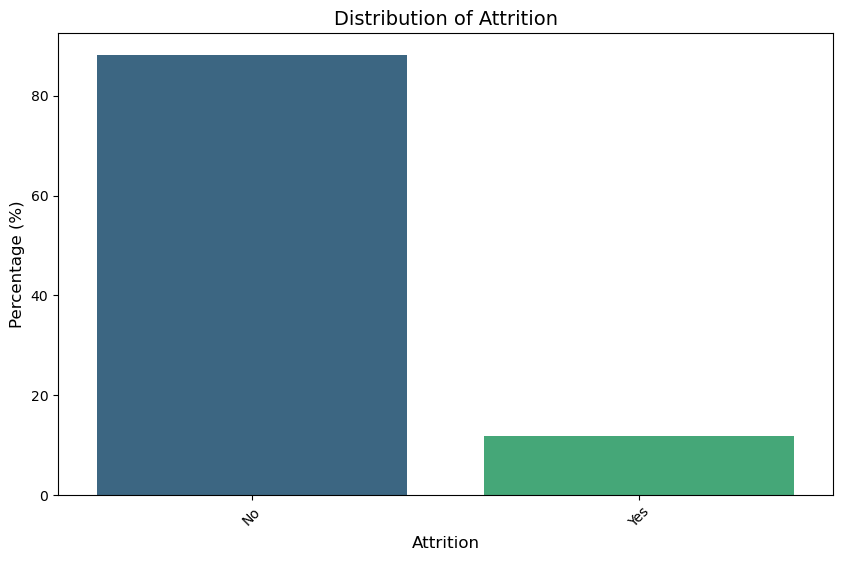

Univariate Analysis for BusinessTravel:
                   Counts  Percentages(%)
BusinessTravel                           
Travel_Rarely        1184           70.64
Travel_Frequently     320           19.09
Non-Travel            172           10.26
----------------------------------------


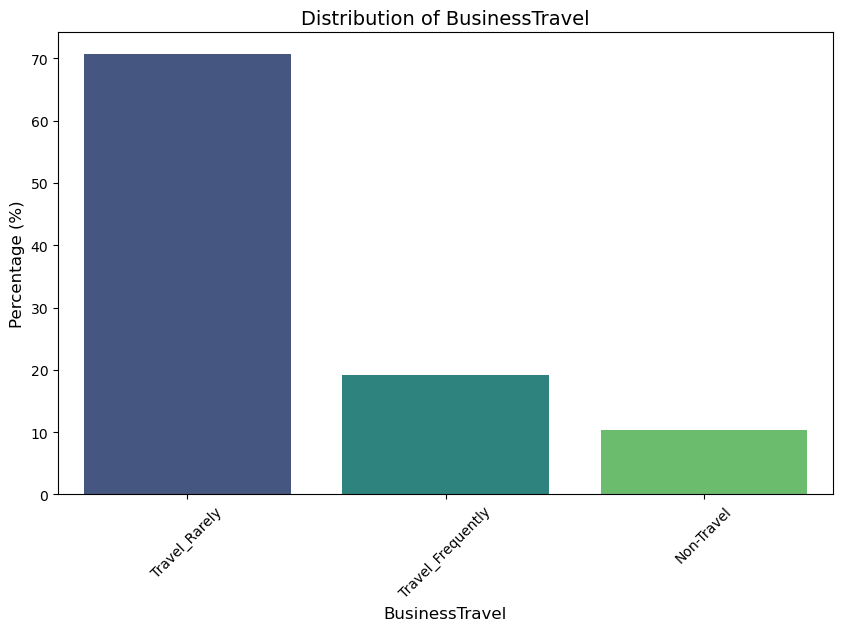

Univariate Analysis for Department:
            Counts  Percentages(%)
Department                        
Maternity      796           47.49
Cardiology     531           31.68
Neurology      349           20.82
----------------------------------------


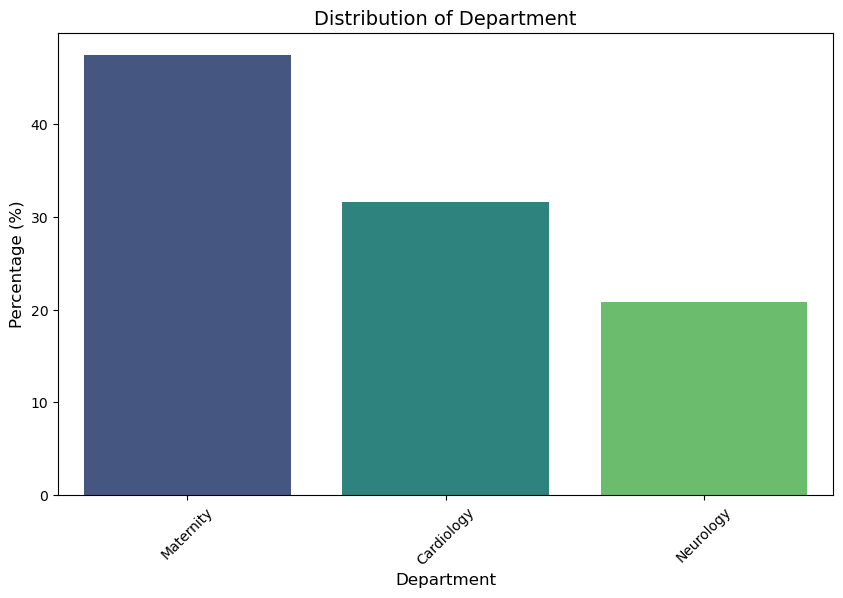

Univariate Analysis for Education:
           Counts  Percentages(%)
Education                        
3             655           39.08
4             447           26.67
2             322           19.21
1             196           11.69
5              56            3.34
----------------------------------------


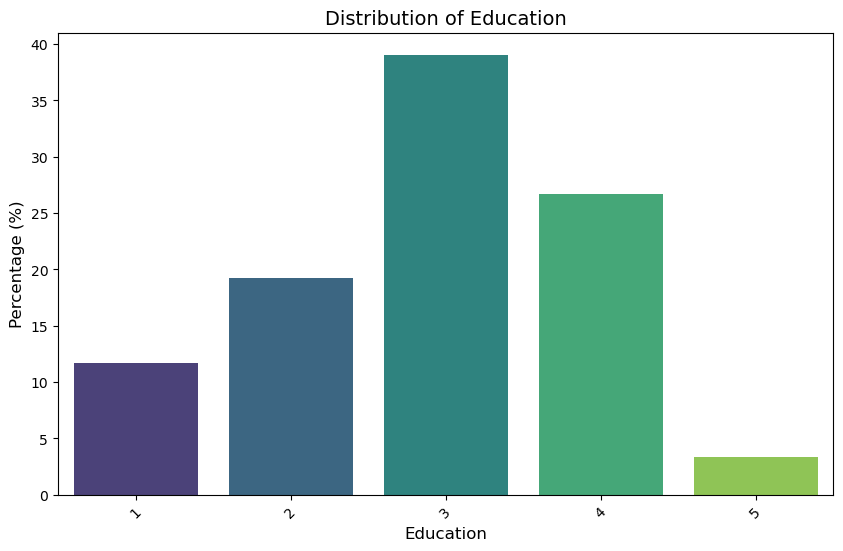

Univariate Analysis for EducationField:
                  Counts  Percentages(%)
EducationField                          
Life Sciences        697           41.59
Medical              524           31.26
Marketing            189           11.28
Technical Degree     149            8.89
Other                 88            5.25
Human Resources       29            1.73
----------------------------------------


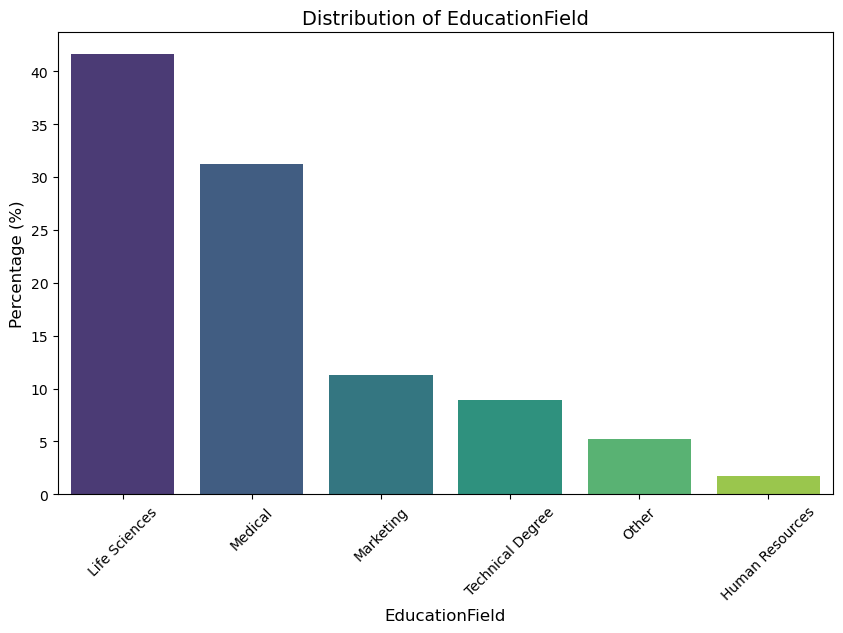

Univariate Analysis for EnvironmentSatisfaction:
                         Counts  Percentages(%)
EnvironmentSatisfaction                        
3                           512           30.55
4                           508           30.31
1                           330           19.69
2                           326           19.45
----------------------------------------


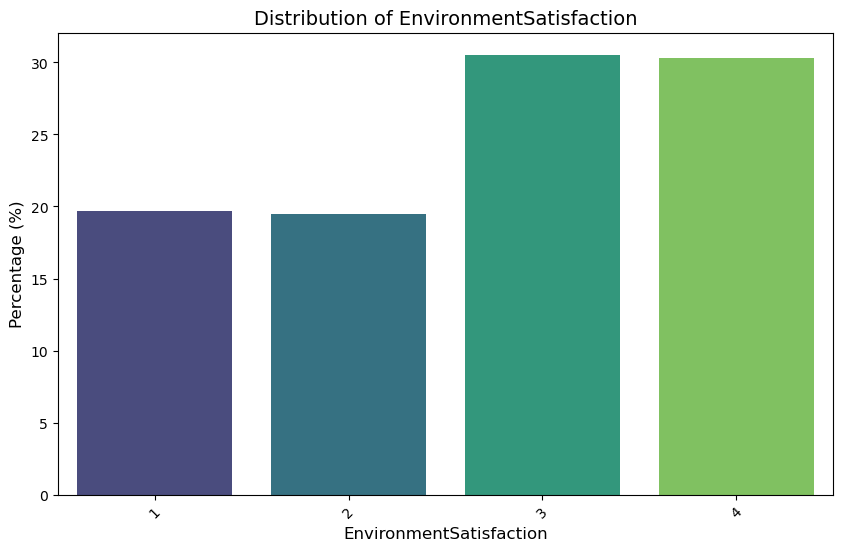

Univariate Analysis for JobSatisfaction:
                 Counts  Percentages(%)
JobSatisfaction                        
4                   530           31.62
3                   507           30.25
1                   329           19.63
2                   310           18.50
----------------------------------------


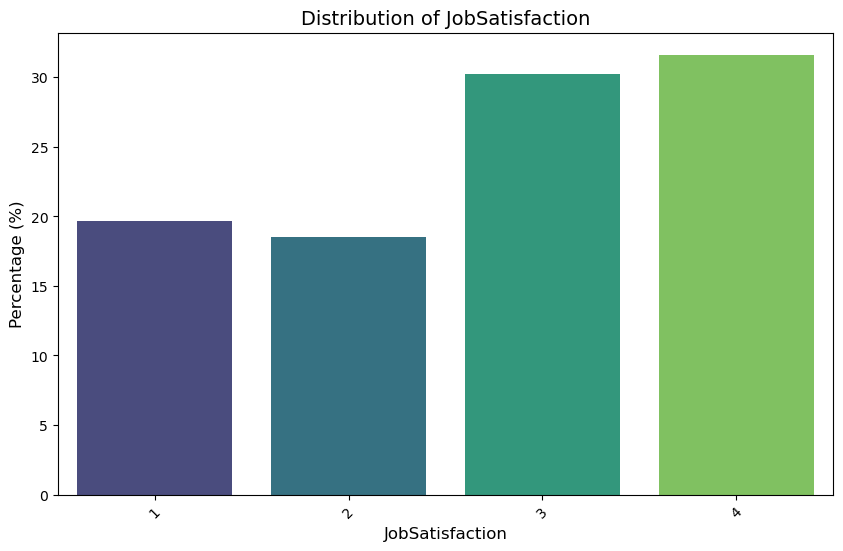

Univariate Analysis for Gender:
        Counts  Percentages(%)
Gender                        
Male       998           59.55
Female     678           40.45
----------------------------------------


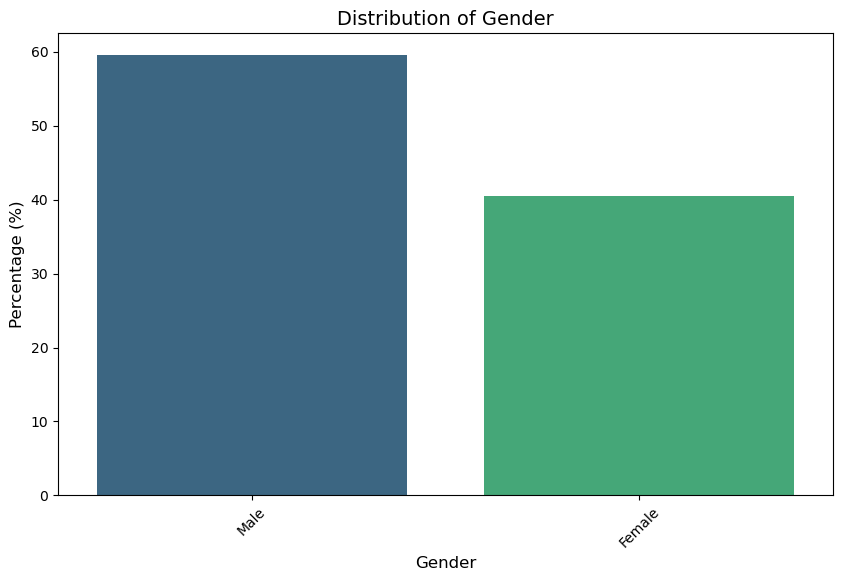

Univariate Analysis for JobInvolvement:
                Counts  Percentages(%)
JobInvolvement                        
3                  983           58.65
2                  433           25.84
4                  164            9.79
1                   96            5.73
----------------------------------------


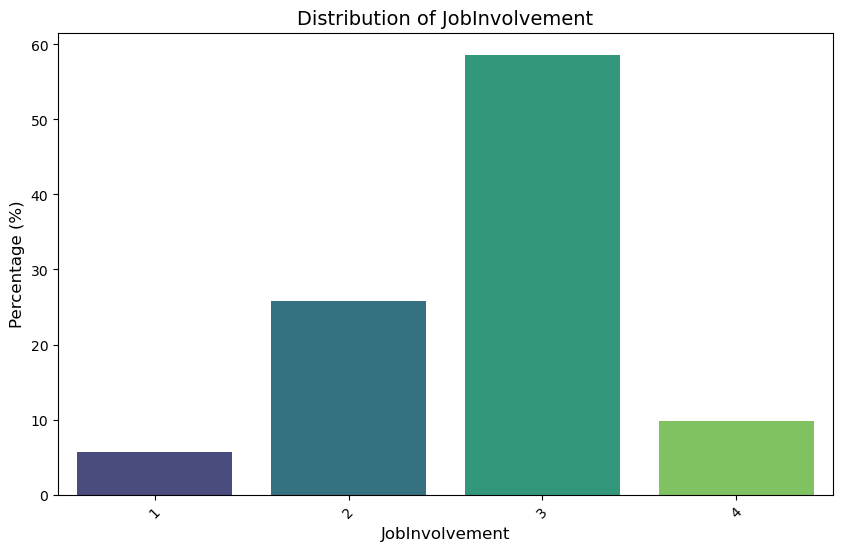

Univariate Analysis for JobLevel:
          Counts  Percentages(%)
JobLevel                        
1            621           37.05
2            606           36.16
3            246           14.68
4            122            7.28
5             81            4.83
----------------------------------------


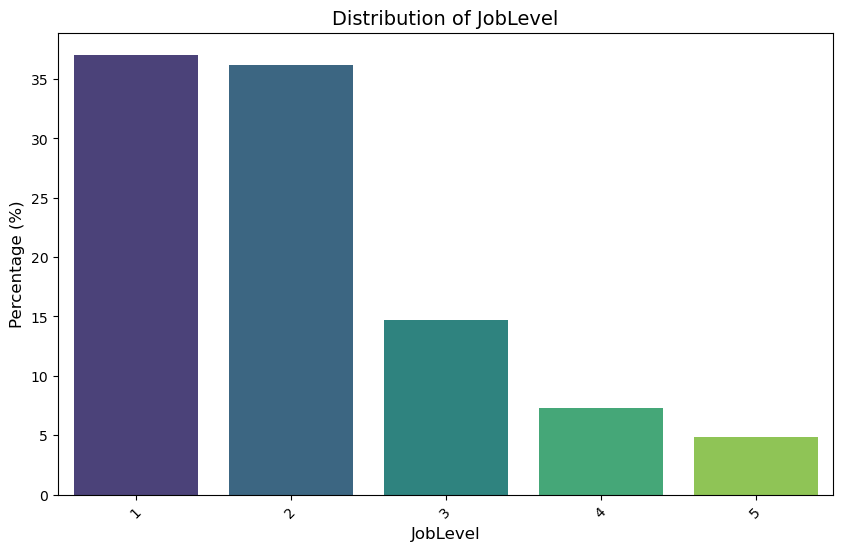

Univariate Analysis for JobRole:
                Counts  Percentages(%)
JobRole                               
Nurse              822           49.05
Other              534           31.86
Therapist          189           11.28
Administrative     115            6.86
Admin               16            0.95
----------------------------------------


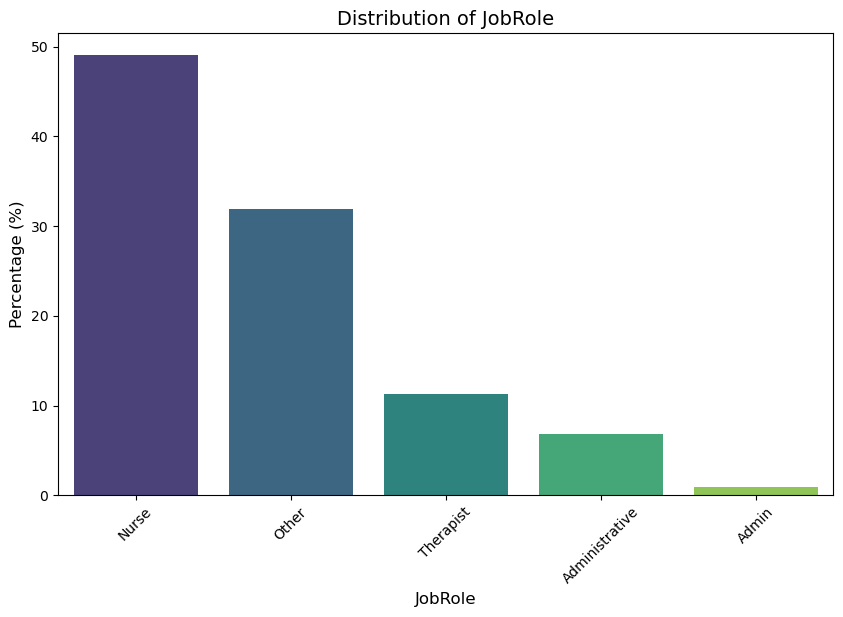

Univariate Analysis for MaritalStatus:
               Counts  Percentages(%)
MaritalStatus                        
Married           777           46.36
Single            522           31.15
Divorced          377           22.49
----------------------------------------


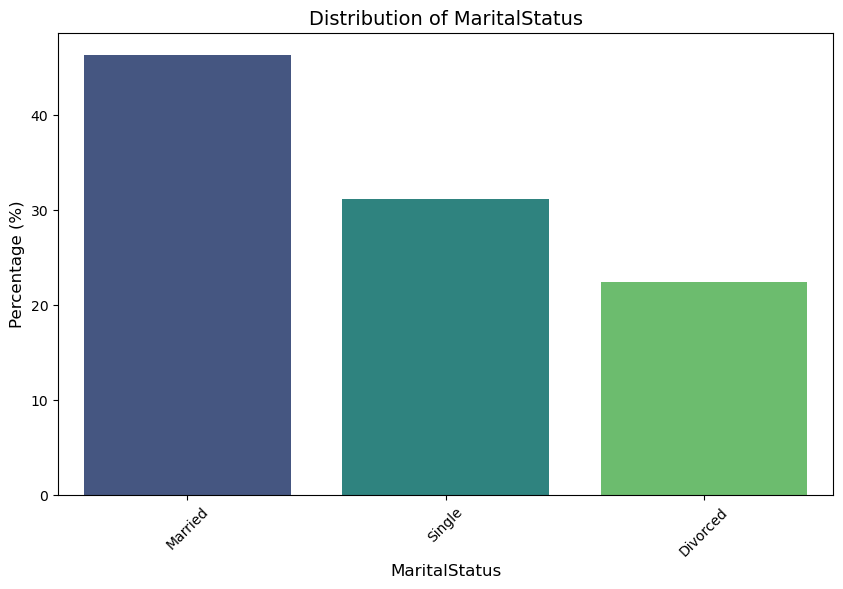

Univariate Analysis for OverTime:
          Counts  Percentages(%)
OverTime                        
No          1200            71.6
Yes          476            28.4
----------------------------------------


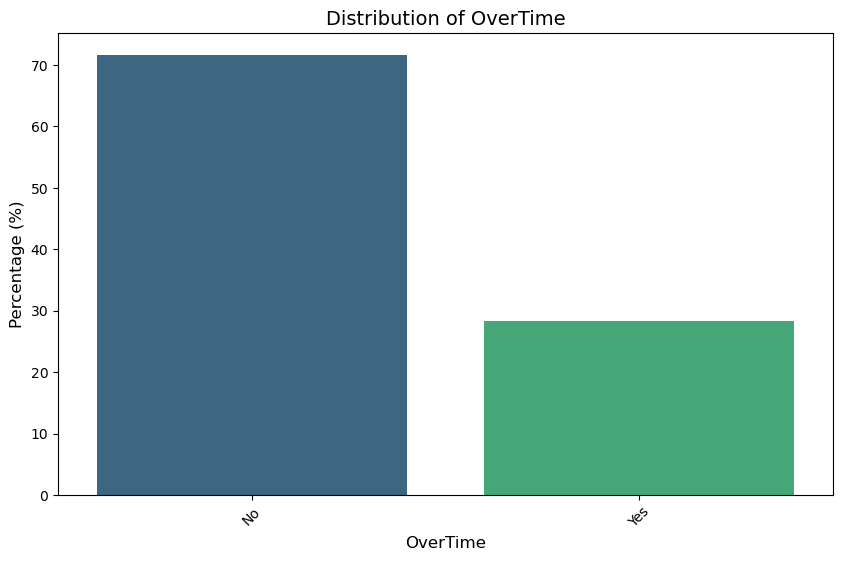

Univariate Analysis for PerformanceRating:
                   Counts  Percentages(%)
PerformanceRating                        
3                    1424           84.96
4                     252           15.04
----------------------------------------


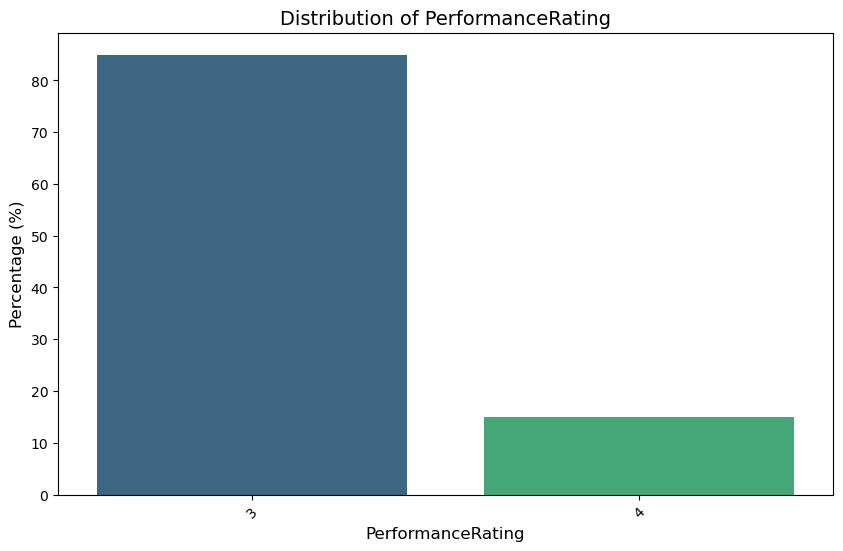

Univariate Analysis for RelationshipSatisfaction:
                          Counts  Percentages(%)
RelationshipSatisfaction                        
3                            526           31.38
4                            494           29.47
2                            346           20.64
1                            310           18.50
----------------------------------------


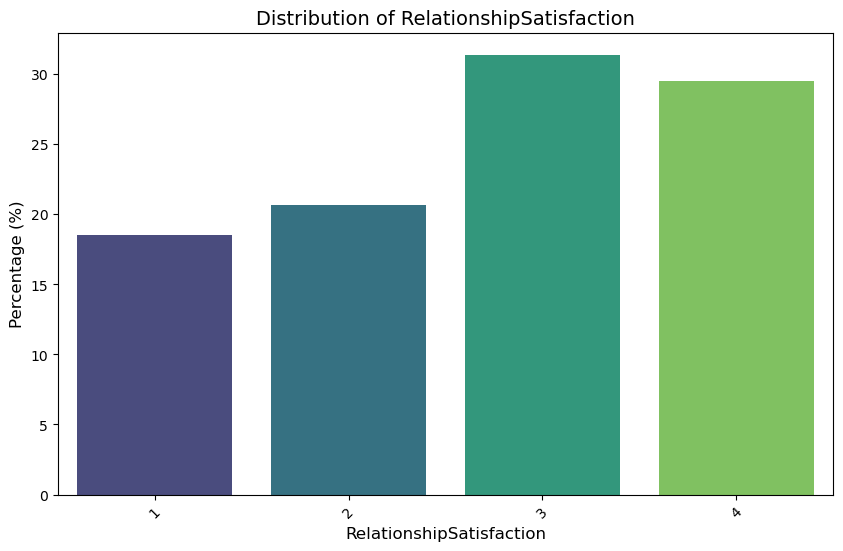

Univariate Analysis for WorkLifeBalance:
                 Counts  Percentages(%)
WorkLifeBalance                        
3                  1028           61.34
2                   385           22.97
4                   173           10.32
1                    90            5.37
----------------------------------------


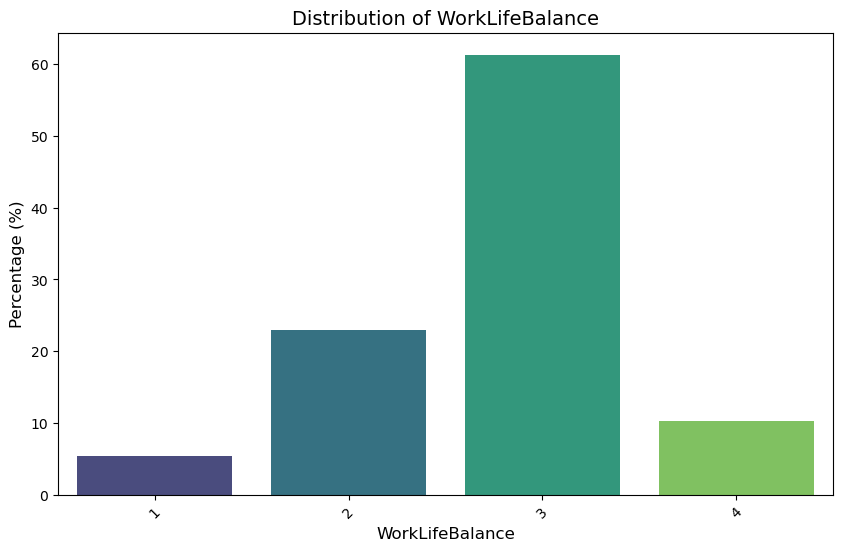

In [16]:
# univariate analysis on categorical columns 
for col in categorical_cols: 
    print(f'Univariate Analysis for {col}:')
    counts = healthcare_data[col].value_counts()
    percentages = healthcare_data[col].value_counts(normalize=True) * 100 
    univariate_df = pd.DataFrame({'Counts': counts, 'Percentages(%)': percentages.round(2)})
    print(univariate_df)
    print('-'* 40)
    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.index, y=percentages.values, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

### Observation from univariate analysis visualization
1. **Attrition**:  
    - `11.87%` of employees left the company 
2. **Business Travel**
    - `70.64%` of employees travel rarely
3. **Department**
    - The maternity department accounts for `47.49%` of the workforce, followed by cardiology and neurology  
4. **Education**
    - `39.08%` of employees have a Level 3 Education 
5. **Educational Field**
    - `41.59%` of employees have studied Life Sciences followed by `31.26%` in Medical studies 
6. **Workforce**
    - `Half` of the workforce consists of Nurses 
7. **Work likfe balance**
    - `61.34%` of employees have a good Work life balance 
8. **Gender**
    - Men represent `59.55%` of employees
9. **Marital status**
    - Half of all employees are married 
10. **Job satisfaction**
    - `61.87%` of employees are satisfied with their jobs 
11. **Overtime**
    - Only `28%`of employees work overtime 
12. **Relationship satisfaction**
    - `31.68%` of employees have good relationship satisfaction
13. **Job environment satisfaction**
    - `60%` of employees are satisfied with their work enironment 
    

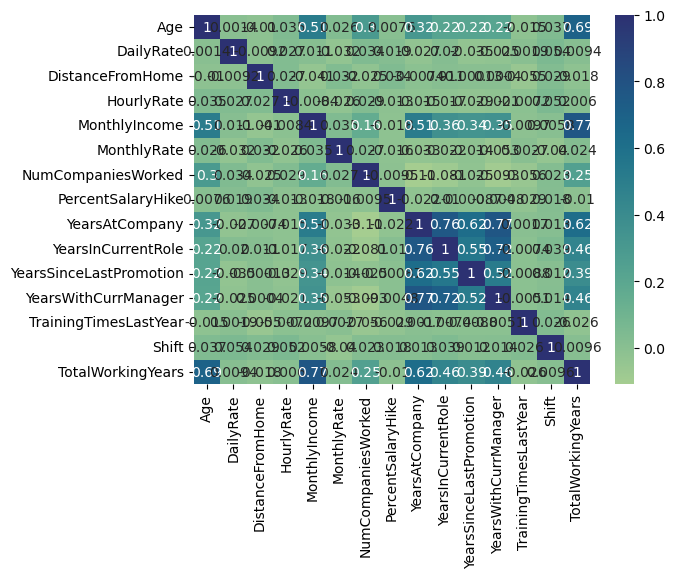

In [17]:
# plot heatmap correlation 
plt.Figure(figsize=(14, 8))
sns.heatmap(healthcare_data[numerica_cols].corr(), annot=True, cmap='crest')
plt.show()

### Observations from the Correlation Heatmap:
1. **Highly Correlated Pairs**:
   - `YearsAtCompany` and `TotalWorkingYears` (~0.77): Employees with more total working years tend to stay longer at their current company.
   - `YearsWithCurrManager` and `YearsInCurrentRole` (~0.72): Strong correlation suggests that employees who have been in their current role longer also tend to have worked longer with their current manager.
   - `MonthlyIncome` and `TotalWorkingYears` (~0.62): More experienced employees tend to earn higher incomes.
   - `Age`and `MonthlyIncome` (0.50): Strong correlation 

2. **Weakly or Negatively Correlated Pairs**:
   - `DistanceFromHome` has low correlations with most other variables, indicating it may not strongly influence other features.
   - `YearsSinceLastPromotion` shows weak correlations with other variables, which might indicate minimal interaction with other metrics.

3. **Notable Trends**:
   - Features like `Shift` and `TrainingTimesLastYear` appear to have weak or no correlations with most variables.


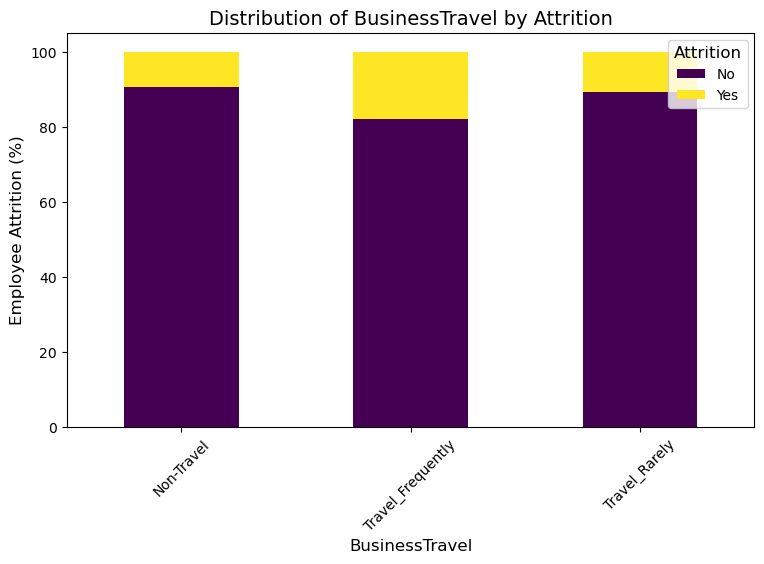

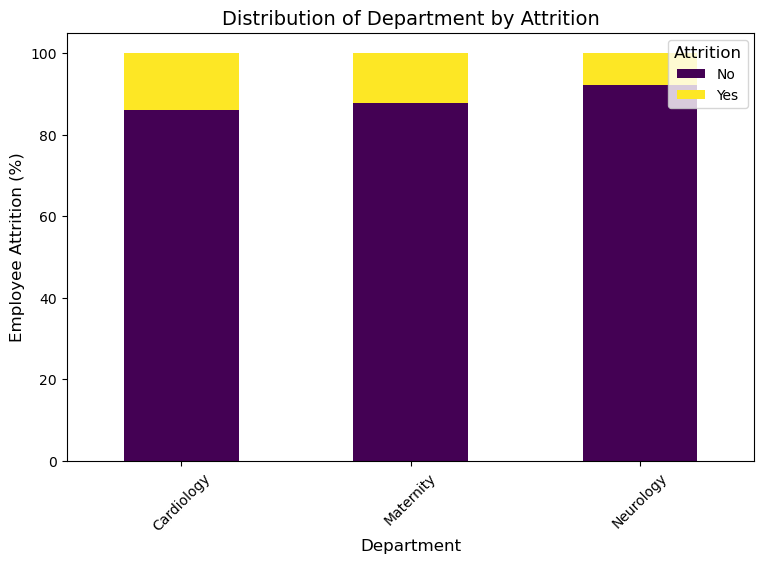

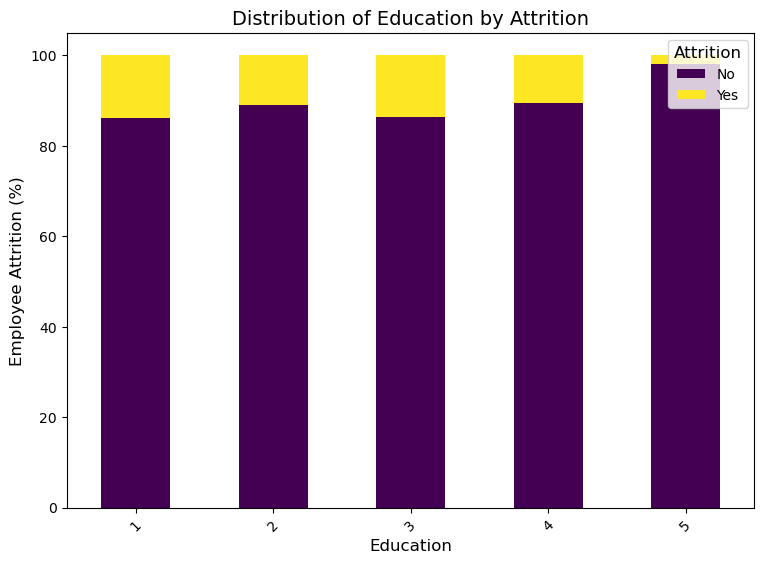

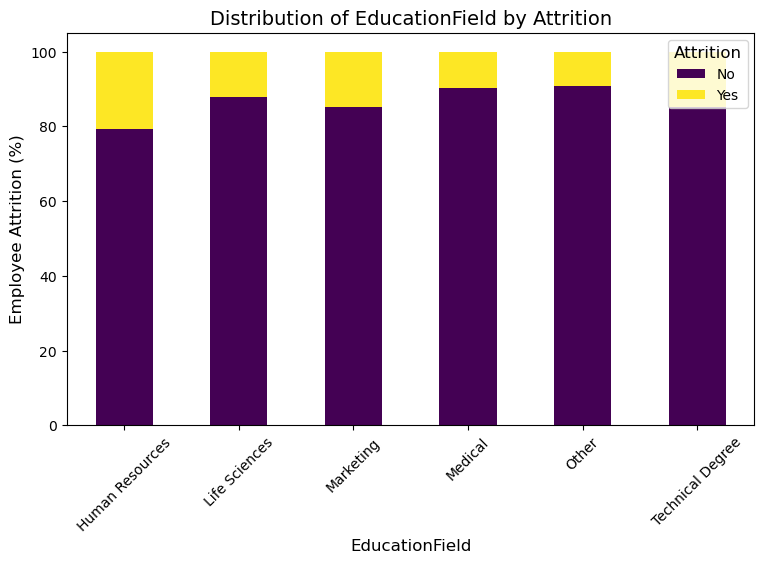

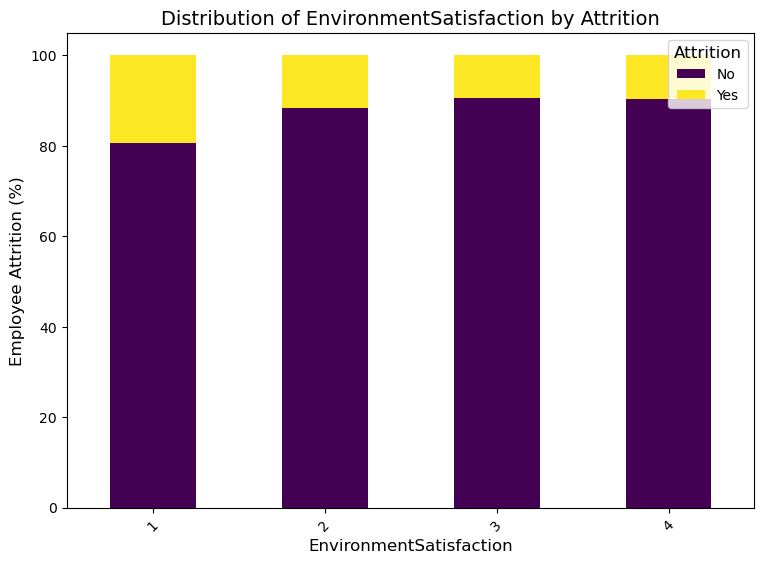

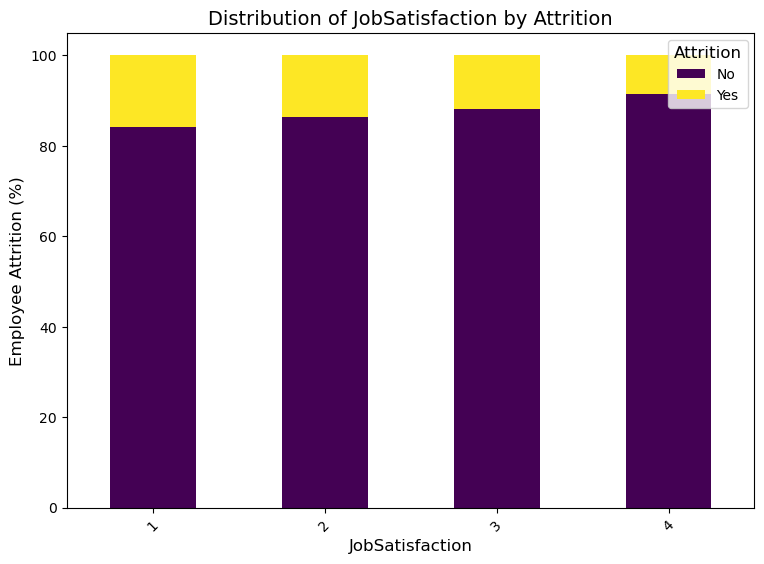

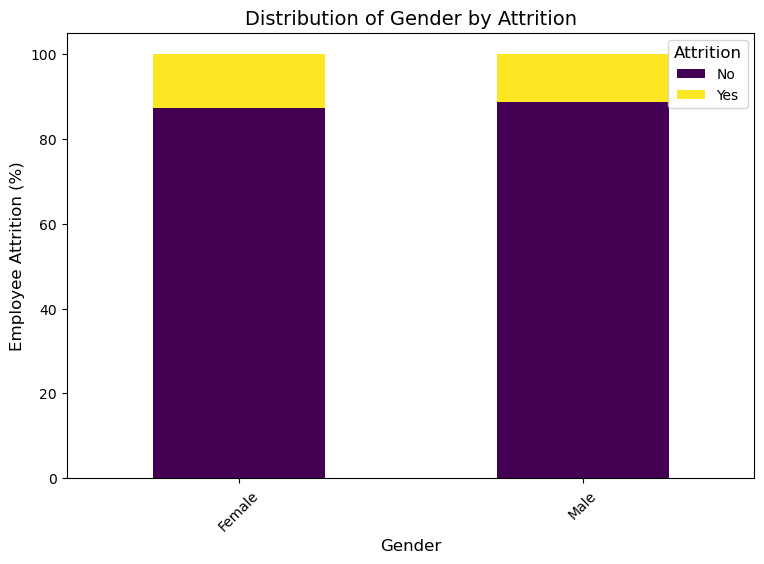

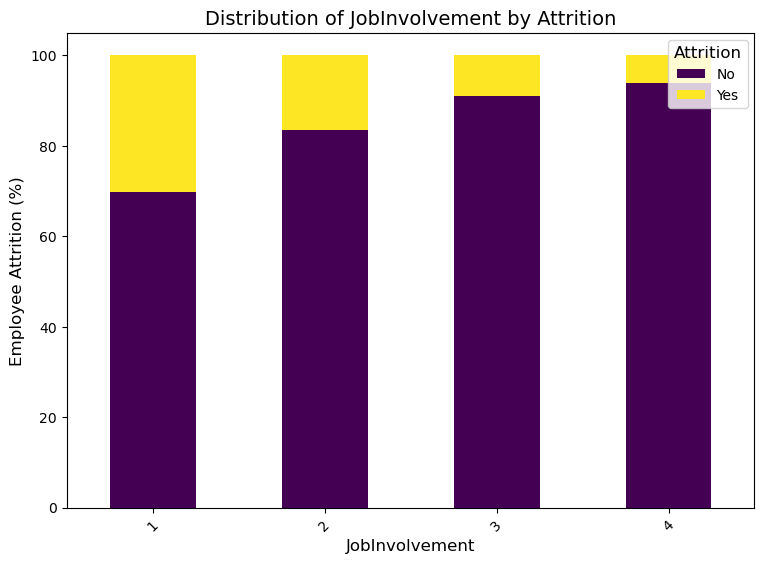

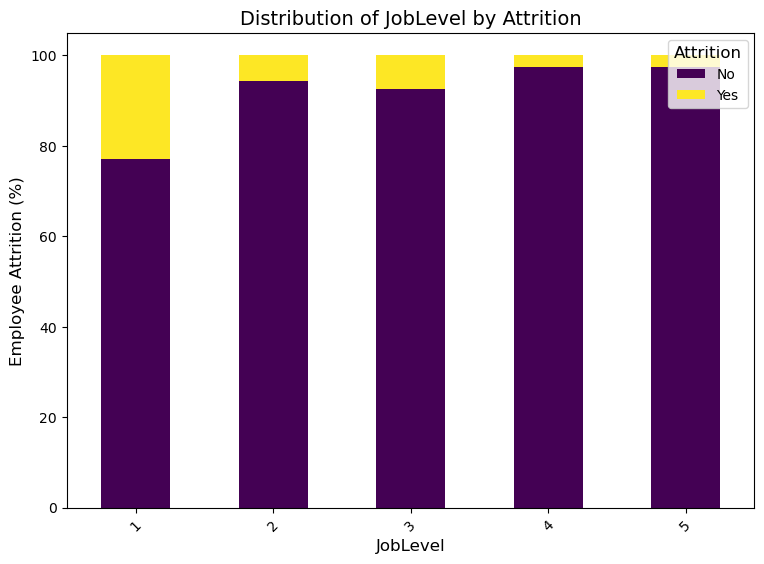

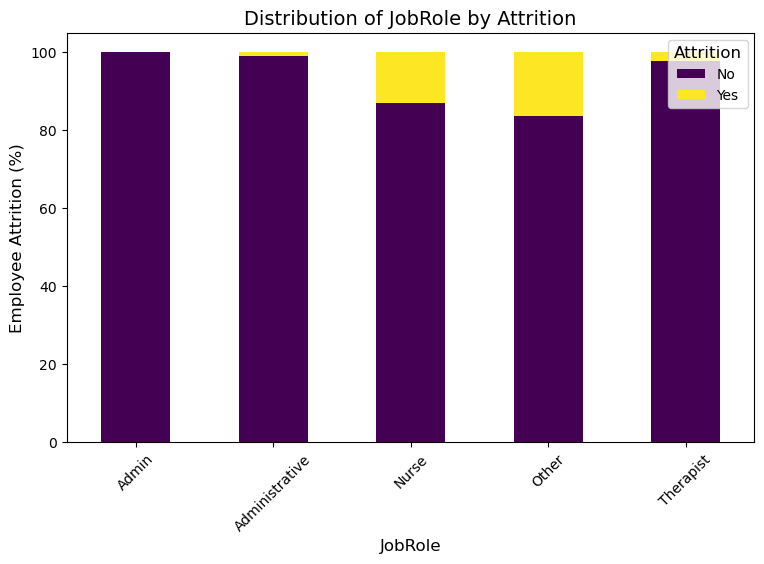

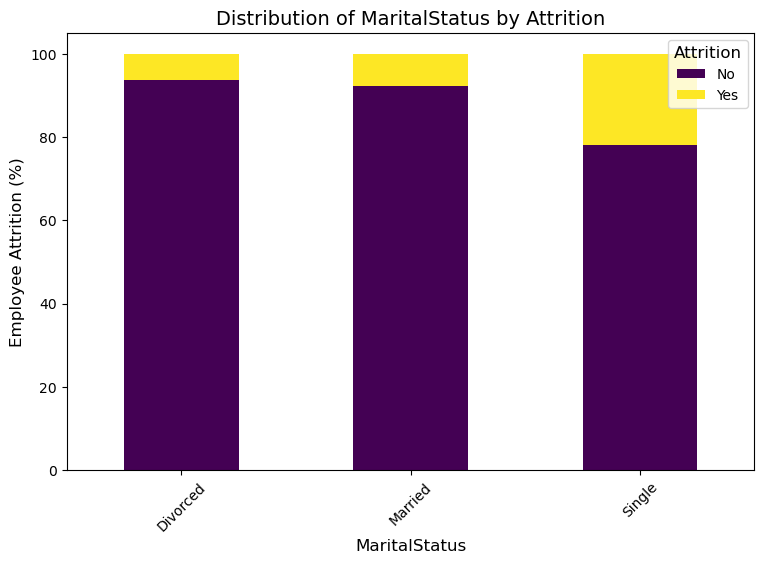

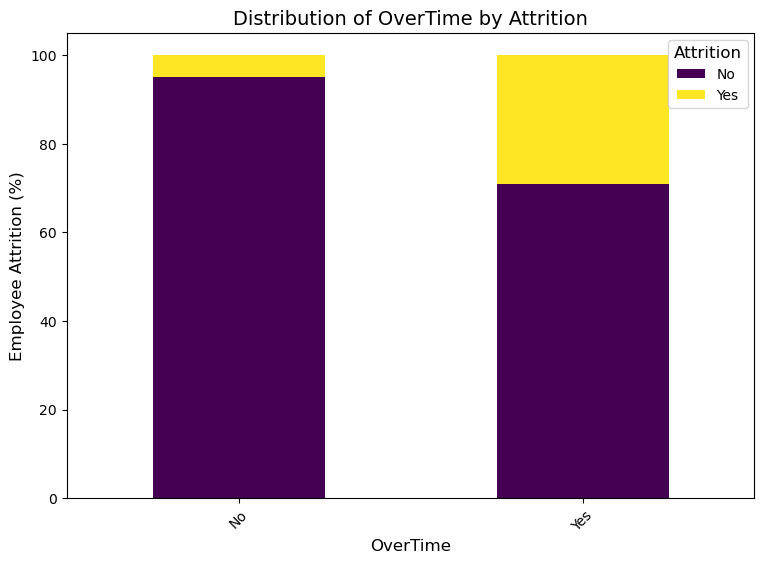

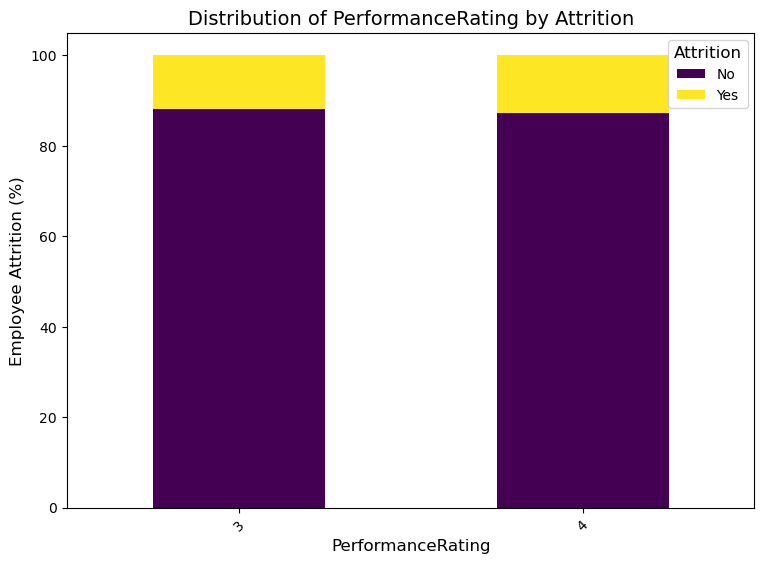

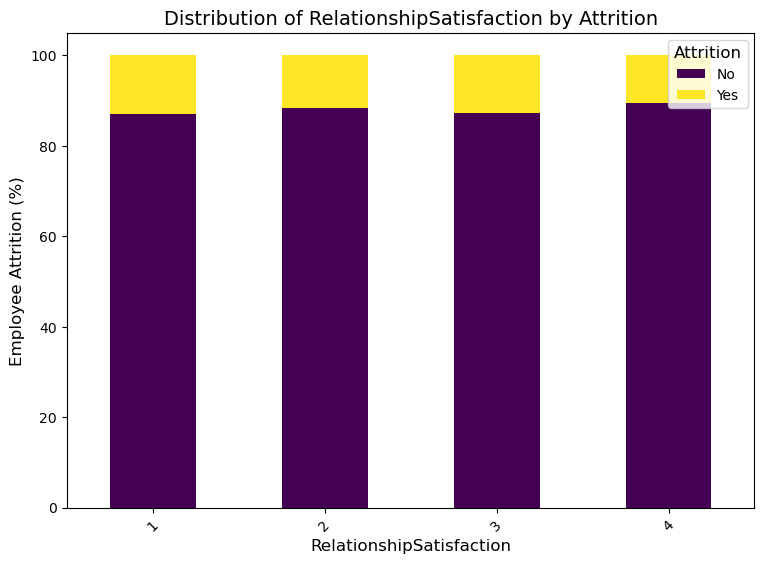

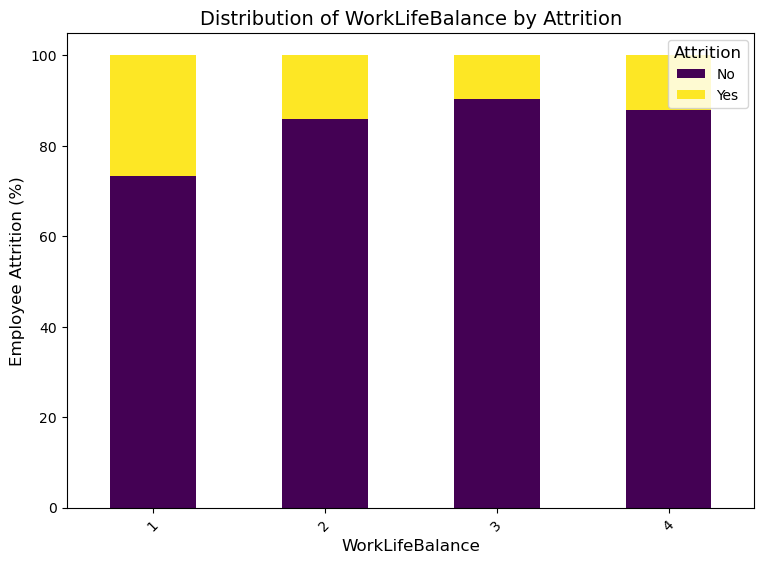

In [18]:
# visualize the relationship between target variable and the categorical variables 
for i in categorical_cols: 
    if i != 'Attrition': # exclude the target variable itself 
        fig, ax = plt.subplots(figsize=(8,6))
        crosstab = pd.crosstab(healthcare_data[i], healthcare_data['Attrition'], normalize= 'index') * 100
        crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
        ax.set_ylabel('Employee Attrition (%)', fontsize=12)
        ax.set_xlabel(i, fontsize=12)
        ax.tick_params(axis='x', rotation=45, labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.set_title(f'Distribution of {i} by Attrition', fontsize=14)
        ax.legend(title='Attrition', title_fontsize=12, fontsize=10, loc='upper right')
        plt.tight_layout(pad=2.0)
        plt.show()

### Observations:
1. **Non-Travel**:
   - The majority of employees who do not travel (`Non-Travel`) have a lower attrition rate compared to the other categories.
   - Employees who travel frequently have a higher likelihood of leaving the company.


2. **Department**:
   - Employees in this category have a noticeably higher attrition rate compared to the `Non-Travel` and `Travel_Rarely` categories.

3. **Travel Rarely**:
   - The attrition rate for employees who travel rarely is higher than `Non-Travel` but lower than `Travel Frequently`.
   - This group exhibits a more balanced distribution compared to frequent travelers.


In [19]:
healthcare_data.groupby(['Attrition'])[numerica_cols].median().T

Attrition,No,Yes
Age,36.0,29.0
DailyRate,809.0,688.0
DistanceFromHome,7.0,9.0
HourlyRate,66.0,63.0
MonthlyIncome,5204.0,2741.0
MonthlyRate,14034.0,15497.0
NumCompaniesWorked,2.0,1.0
PercentSalaryHike,14.0,14.0
YearsAtCompany,6.0,2.0
YearsInCurrentRole,3.0,2.0


1. **Median Age** for employees who left is 29yrs compared to those that say who are 36yrs 
2. **DailyRate** The daily rate for employees that left are much lower than the one that stays Lower daily compensation ould be the issue
3. **DistanceFromHome** Attrition is higher among employees who are further from their homes 
4. **MonthlyIncome** Employees who left have much lower median monthly income than those that stayed 
5. **NumCompaniesWorked** Employees who have their first job with the company have higher attrition 
6. **YearsArCompany** Median tenure for employees who left is significantly shorter (2) compared to those who stayed (6)
7. **TotalWorkingYears** Employees with 5yrs are more likely to leave the company. Less experienced employees may be more likely to leave

In [20]:
data = healthcare_data.copy()

# Data preprocessing 


In [21]:
# categorical variables for one hot encoding for 
one_hot_cols = ['Attrition', 'OverTime', 'BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'EducationField', 'JobRole']

In [22]:
# categorical variables for ordinal encoding 
ordinal_cols = ['Education', 'JobLevel', 'JobInvolvement', 'WorkLifeBalance', 'EnvironmentSatisfaction', 'JobSatisfaction']

In [23]:
# apply one hot encoding 
data_one_hot = pd.get_dummies(data[one_hot_cols], drop_first=True)

In [24]:
# apply ordinal encoding 
ordinal_encoder = OrdinalEncoder()
data_ordinal = data[ordinal_cols]
data_ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(data_ordinal), columns=ordinal_cols, index=data.index)

In [25]:
# combine encoded features with other features 
data.drop(columns=one_hot_cols + ordinal_cols, inplace=True) # drop original categorical columns 
# concatenate encoded features with the rest of the dataset 
data_encoded = pd.concat([data, data_one_hot, data_ordinal_encoded], axis=1)
print(data_encoded.head())

   Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  MonthlyRate  \
0   41       1102                 1          94           5993        19479   
1   49        279                 8          61           5130        24907   
2   37       1373                 2          92           2090         2396   
3   33       1392                 3          56           2909        23159   
4   27        591                 2          40           3468        16632   

   NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0                   8                 11                  3   
1                   1                 23                  4   
2                   6                 15                  3   
3                   1                 11                  3   
4                   9                 12                  3   

   RelationshipSatisfaction  Shift  TotalWorkingYears  TrainingTimesLastYear  \
0                         1      0                  8             

In [26]:
# convert boolean types columns to integer 
data_encoded = data_encoded.astype(int)

# Model Building 

In [27]:
# seperate features and target 
X = data_encoded.drop(columns=['Attrition_Yes']) # features 
y = data_encoded['Attrition_Yes'] # target 

In [28]:
# split the data into train test 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, stratify=y)

In [29]:
# initialize StandardScaler 
scaler = StandardScaler()
# fit the scaler on the train data and transform training data
X_train_scaled = scaler.fit_transform(X_train)
# fit the same scaler on test data and transform test data 
X_test_scaled = scaler.fit_transform(X_test) 

In [30]:
# check the size of the training and test data 
print('Training data for independent variables:' + str(X_train.shape)) 
print('Training data for target variable:'+ str(y_train.shape))
print('Test data for independent variables:'+ str(X_test.shape))
print('Test data for target varibale:'+ str(y_test.shape))

Training data for independent variables:(1173, 40)
Training data for target variable:(1173,)
Test data for independent variables:(503, 40)
Test data for target varibale:(503,)


In [31]:
# initialize random forest classifier 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# train the model 
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# make predictions 
y_pred = rf_model.predict(X_test_scaled)

In [33]:
# evaluate the model
print('Model performance Metrics:')
print(f'Accuracy score:{accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score: {recall_score(y_test, y_pred):.2f}')
print(f'F1 score: {f1_score(y_test, y_pred):.2f}')

Model performance Metrics:
Accuracy score:0.91
Precision score: 0.74
Recall score: 0.33
F1 score: 0.46


In [34]:
# classification report 
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       443
           1       0.74      0.33      0.46        60

    accuracy                           0.91       503
   macro avg       0.83      0.66      0.70       503
weighted avg       0.90      0.91      0.89       503



In [35]:
def metrics_score(actual, predicted):
    # Print classification report
    print(classification_report(actual, predicted))

    # Compute confusion matrix
    cm = confusion_matrix(actual, predicted)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'], cmap='viridis')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       443
           1       0.74      0.33      0.46        60

    accuracy                           0.91       503
   macro avg       0.83      0.66      0.70       503
weighted avg       0.90      0.91      0.89       503



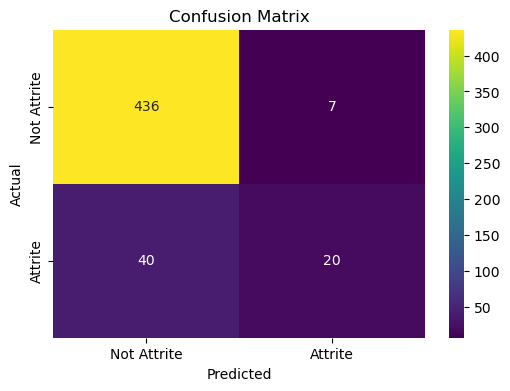

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1034
           1       0.99      0.99      0.99       139

    accuracy                           1.00      1173
   macro avg       1.00      0.99      0.99      1173
weighted avg       1.00      1.00      1.00      1173



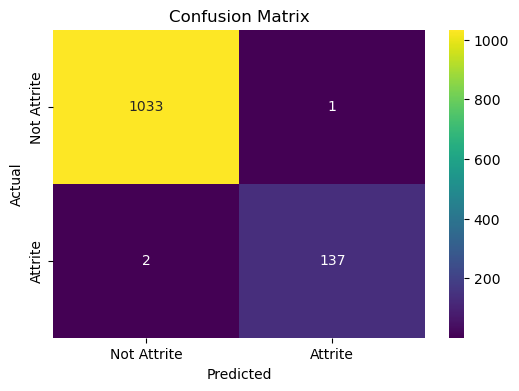

In [36]:
# For the test set
metrics_score(y_test, y_pred)

# For the training set
y_train_pred = rf_model.predict(X_train_scaled)
metrics_score(y_train, y_train_pred)


### **Analysis of the Confusion Matrices**

#### 1. **Confusion Matrix for the Test Set**
   - **Values in the Matrix**:
     - **True Negatives (436)**: The model correctly predicted "Not Attrite" for 436 employees.
     - **False Positives (7)**: The model incorrectly predicted "Attrite" for 7 employees who did not attrite.
     - **False Negatives (40)**: The model incorrectly predicted "Not Attrite" for 40 employees who actually attrited.
     - **True Positives (20)**: The model correctly predicted "Attrite" for 20 employees.

   - **Key Observations**:
     - The model performs very well for the majority class ("Not Attrite"), with **436 correct predictions** and only **7 false positives**.
     - However, the model struggles with the minority class ("Attrite"), correctly predicting only **20 attrition cases** while missing **40 attrition cases** (false negatives).
     - This indicates a significant imbalance in recall between the two classes.

   - **Interpretation**:
     - The model is skewed toward predicting "Not Attrite" because the dataset is imbalanced, with far fewer "Attrite" instances.

---

#### 2. **Confusion Matrix for the Training Set**
   - **Values in the Matrix**:
     - **True Negatives (1033)**: The model correctly predicted "Not Attrite" for 1033 employees.
     - **False Positives (1)**: The model incorrectly predicted "Attrite" for 1 employee who did not attrite.
     - **False Negatives (2)**: The model incorrectly predicted "Not Attrite" for 2 employees who actually attrited.
     - **True Positives (137)**: The model correctly predicted "Attrite" for 137 employees.

   - **Key Observations**:
     - The model performs almost perfectly on the training data, with very few errors:
       - **1 false positive** and **2 false negatives**.
       - This may indicate the model has memorized the training data (potential overfitting).
     - It predicts "Attrite" much more accurately for the training data compared to the test data.

   - **Interpretation**:
     - The excellent performance on the training set suggests the model may be overfitting, as its generalization to the test set is much worse for the minority class.

1. **Class Imbalance Effect**:
   - The test set reveals the model's struggle with class imbalance, as it misses most attrition cases (low recall for "Attrite").
   - In contrast, the training set shows the model handles "Attrite" better, but this may be due to overfitting.

2. **Overfitting Signs**:
   - The near-perfect performance on the training set (only 3 errors) suggests that the model has learned the training data too well and fails to generalize effectively to the test data.


In [37]:
def metrics_score_2(actual, predicted): 
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True,fmt='d', xticklabels=['Not attrite', 'Attrite'], yticklabels=['Not attrie', 'Attrite'], cmap='viridis')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion matrix')
    plt.show()

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       443
           1       0.74      0.33      0.46        60

    accuracy                           0.91       503
   macro avg       0.83      0.66      0.70       503
weighted avg       0.90      0.91      0.89       503



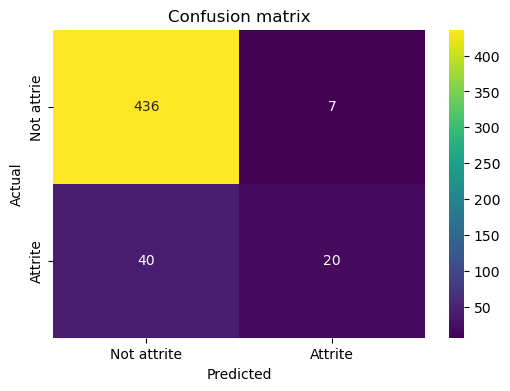

In [38]:
metrics_score_2(y_test, y_pred)

### **Model improvement**
- Regularization
    - We can perform regularization for the Random forest model to prevent overfitting. 
    - **GridSearch** to find best combinations of hyperparemeters to tune the model


In [39]:
# define hyperparameters grid
param_grid = {
    'n_estimators':[50, 100, 150],
    'max_depth':[10, 20, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'max_features':['sqrt', 'log2',None]
}

In [40]:
# initialize random forest classifier 
rf_model_tune = RandomForestClassifier(random_state=42, class_weight='balanced')

# set up GridSearch 
grid_search = GridSearchCV(estimator=rf_model_tune, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# perform the GridSearch 
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1', verbose=1)

In [41]:
# best hyperparameters 
print('Best parameter', grid_search.best_params_)

Best parameter {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [42]:
# train model on best parameters
best_rf = grid_search.best_estimator_

In [43]:
# prediction on test set 
y_pred_best = best_rf.predict(X_test_scaled)


Classification report and Confusion matrix after regularization:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       443
           1       0.58      0.47      0.52        60

    accuracy                           0.90       503
   macro avg       0.76      0.71      0.73       503
weighted avg       0.89      0.90      0.89       503



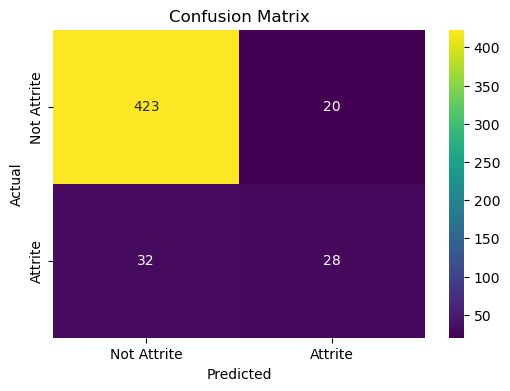

In [44]:
print("\nClassification report and Confusion matrix after regularization:")
metrics_score(y_test,y_pred_best)

#### **Confusion Matrix Analysis**:
1. **Values in the Confusion Matrix**:
   - **True Negatives (422)**:
     - The model correctly predicted "Not Attrite" for 422 employees.
   - **False Positives (21)**:
     - The model incorrectly predicted "Attrite" for 21 employees who did not attrite.
   - **False Negatives (2)**:
     - The model incorrectly predicted "Not Attrite" for 32 employees who actually attrited.
   - **True Positives (8)**:
     - The model correctly predicted "Attrite" for 28 employees.

2. **Key Observations**:
   - The model has improved recall for "Attrite" (Class 1), correctly identifying **28 attrition cases** compared to 20 cases before regularization.
   - However, there are still **32 false negatives**, meaning the model misses over half of the actual attrition cases.

### **Comparison With Pre-Regularization Results**:
| Metric             | Pre-Regularization | Post-Regularization | Improvement |
|--------------------|--------------------|---------------------|-------------|
| **Class 0 Recall** | 0.98               | 0.95                | Slight Drop |
| **Class 1 Recall** | 0.33               | 0.47                | Significant |
| **Class 1 Precision** | 0.74            | 0.57                | Slight Drop |
| **F1-Score (Class 1)** | 0.46           | 0.51                | Improved    |
| **Accuracy**       | 0.91               | 0.89                | Slight Drop |

**Key Takeaways**:
- The recall for "Attrite" (Class 1) improved significantly, from **33% to 47%**.
- Slight reduction in precision and accuracy is expected due to better focus on the minority class.
- The model is more balanced now but still struggles to identify all attrition cases.


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       443
           1       0.54      0.63      0.58        60

    accuracy                           0.89       503
   macro avg       0.75      0.78      0.76       503
weighted avg       0.90      0.89      0.90       503



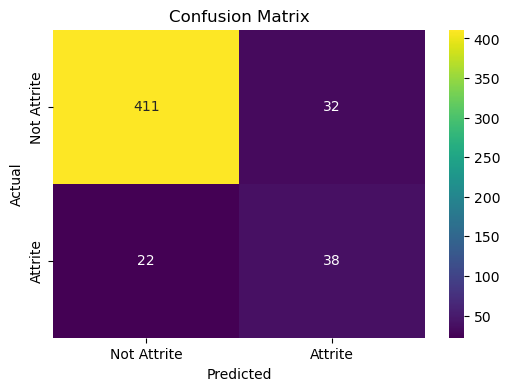

In [45]:
# threshold adjust to improve model recall
y_probs = best_rf.predict_proba(X_test_scaled)[:,1] # probabilities of class 1 
y_pred_adjusted = (y_probs >= 0.4).astype(int)
metrics_score(y_test,y_pred_adjusted)

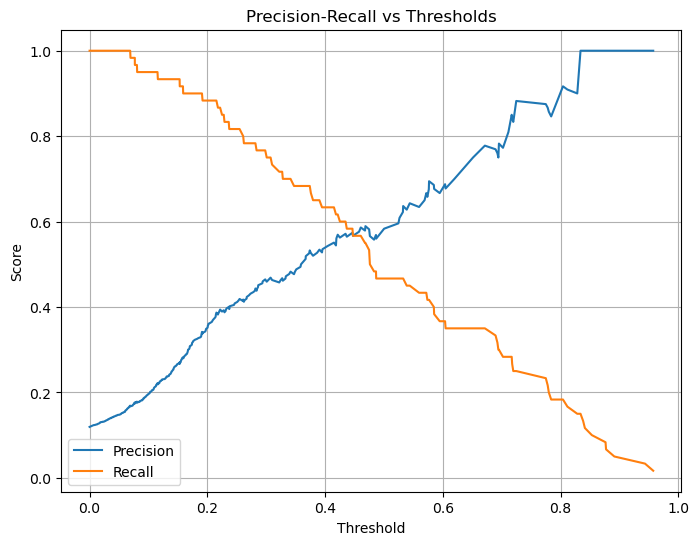

In [46]:
# precision-recall vs threshold plot 
precison, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(thresholds, precison[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Thresholds')
plt.legend()
plt.grid()
plt.show()

### **Impact of the Threshold (0.4)**

By lowering the threshold to 0.4:
1. **Class 1 Recall Improved**:
   - Recall for "Attrite" increased from **0.47 (regularization)** to **0.65**.
   - The model is now capturing more true positives for the minority class.

2. **Class 1 Precision Decreased**:
   - Precision for "Attrite" dropped slightly from **0.57 (regularization)** to **0.55**.
   - This is expected, as lowering the threshold increases the number of false positives (32 in this case).

3. **Better Balance**:
   - The F1-score for "Attrite" improved to **0.60**, indicating a better balance between precision and recall for the minority class.

4. **Slight Impact on Overall Accuracy**:
   - Accuracy remains high at **89%**, showing that the model still performs well despite the threshold adjustment.


### **Visual Insights from the Confusion Matrix**

- The increase in **true positives (39)** shows the threshold adjustment helped the model capture more attrition cases.
- The increase in **false positives (32)** is an acceptable trade-off to improve recall for "Attrite."

### XGBOOST Model

In [47]:
import xgboost
import sklearn
print("XGBoost version:", xgboost.__version__)
print("scikit-learn version:", sklearn.__version__)

XGBoost version: 2.1.1
scikit-learn version: 1.3.0


In [48]:
from xgboost import XGBClassifier

In [49]:
# set scale_pos_weight for class imbalance
class_0_count = len(y_train[y_train == 0])
class_1_count = len(y_train[y_train == 1])
scale_pos_weight = class_0_count / class_1_count

In [50]:
# initialize xgboost model 
xgb_model = XGBClassifier(n_estimators=100, 
                    learning_rate=0.1, 
                    max_depth=6, 
                    scale_pos_weight=scale_pos_weight, 
                    random_state=42)
# train the model 
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [51]:
 # make predictions 
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [52]:
# evaluate the model 
print("\nClassifiation report:\n")
print(classification_report(y_test, y_pred_xgb))


Classifiation report:

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       443
           1       0.53      0.73      0.62        60

    accuracy                           0.89       503
   macro avg       0.75      0.82      0.78       503
weighted avg       0.91      0.89      0.90       503



### **1. Classification Report Breakdown**
| **Metric**       | **Class 0 (Not Attrite)** | **Class 1 (Attrite)** |
|-----------------|-------------------------|-------------------------|
| **Precision**   | **0.96** (Very High)     | **0.53** (Moderate)     |
| **Recall**      | **0.91** (Slight Drop)   | **0.73** (Improved)     |
| **F1-Score**    | **0.94** (Strong)       | **0.62** (Balanced)     |
| **Support**     | **443 Instances**       | **60 Instances**       |

- **Accuracy**: **89%**, meaning the model is making correct predictions for **89%** of all employees.
- **Macro Average (F1-Score: 0.78)**: Balances performance across both classes.
- **Weighted Average (F1-Score: 0.90)**: Skews toward the majority class but still maintains strong performance.

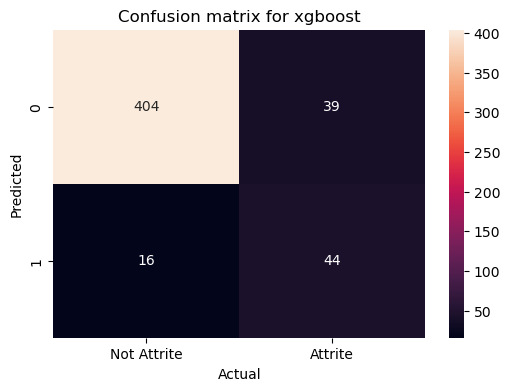

In [54]:
# confusion matrix plot
cm = confusion_matrix(y_test, y_pred_xgb) 
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Not Attrite','Attrite'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix for xgboost')
plt.show()

#### **Confusion Matrix Analysis**:
1. **Values in the Confusion Matrix**:
   - **True Negatives (404)**:
     - The model correctly predicted "Not Attrite" for 404 employees.
   - **False Positives (39)**:
     - The model incorrectly predicted "Attrite" for 39 employees who did not attrite.
   - **False Negatives (16)**:
     - The model incorrectly predicted "Not Attrite" for 16 employees who actually attrited.
   - **True Positives (44)**:
     - The model correctly predicted "Attrite" for 44 employees.

### **2. Comparison With the Random Forest Model**
| **Metric**  | **Random Forest (Threshold 0.4)** | **XGBoost** | **Change** |
|------------|---------------------------------|------------|-----------|
| **Class 0 Precision** | 0.95 | 0.96 | ▲ Slightly Better |
| **Class 1 Precision** | 0.55 | 0.53 | ▼ Slightly Worse |
| **Class 0 Recall** | 0.93 | 0.91 | ▼ Small Drop |
| **Class 1 Recall** | 0.65 | 0.73 | **▲ Significant Improvement** |
| **Class 1 F1-Score** | 0.60 | 0.62 | ▲ Slightly Better |
| **Overall Accuracy** | 0.89 | 0.89 | **No Change** |

#### **Key Takeaways**:
- **XGBoost improves recall for Class 1 (Attrite)**: Recall increased from **0.65 → 0.73**, meaning more attrition cases are correctly identified.
- **Slight drop in precision for Class 1 (0.55 → 0.53)**: This is an acceptable trade-off for higher recall.
- **Class 0 (Not Attrite) performance remains strong**: No significant changes, ensuring the model still performs well overall.
